# [Jupyter]Regression(TF).ipynb
Description   : Regression using tensorflow 2

## 1. 공식을 통해 직접 구현한 회귀(Regression)
2018년 우리나라의 지역별 인구 증가율과 고령인구비율 데이터는 아래와 같다.

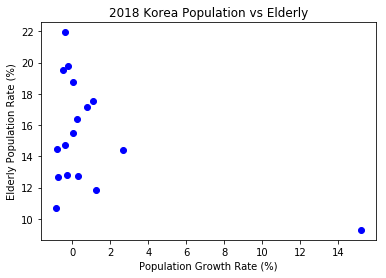

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 데이터셋 시각화
polpulation_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, 0.76, 2.66]
polpulation_old = [12.77, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

plt.plot(polpulation_inc, polpulation_old, 'bo')
plt.title('2018 Korea Population vs Elderly')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

a : -0.18203075467417948 , b : 15.710256767211042


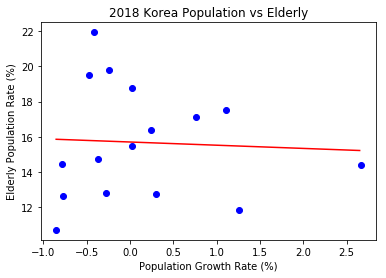

In [3]:
# 아웃라이어 제거
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, 0.76, 2.66]
Y = [12.77, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# x, y에 대한 평균
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

# 최소제곱법으로 a, b 구하기
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a :', a, ', b :', b)

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구한다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 시각화
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.title('2018 Korea Population vs Elderly')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

## 2. 텐서플로우를 활용한 회귀(Regression)
### a. 1차 함수 회귀

a :  0.51864505 , b : 0.88273984
0 번째 a :  0.588645 , b : 0.95273983 , loss 224.7798
100 번째 a :  1.307153 , b : 7.270343 , loss 79.23572
200 번째 a :  0.5303335 , b : 11.638493 , loss 25.854572
300 번째 a :  0.10007459 , b : 14.096373 , loss 12.205446
400 번째 a :  -0.09146125 , b : 15.19206 , loss 9.92377
500 번째 a :  -0.15858768 , b : 15.576126 , loss 9.679071
600 번째 a :  -0.17716451 , b : 15.682414 , loss 9.662254
700 번째 a :  -0.18122864 , b : 15.705667 , loss 9.661518
800 번째 a :  -0.18192707 , b : 15.709664 , loss 9.661499
900 번째 a :  -0.18202043 , b : 15.7102 , loss 9.661499


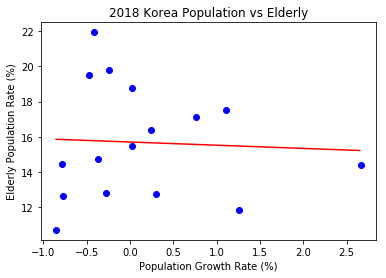

In [4]:
import random

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, 0.76, 2.66]
Y = [12.77, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

a = tf.Variable(random.random())
b = tf.Variable(random.random())

print("a : ", a.numpy(), ", b :", b.numpy())

# 잔차의 제곱의 평균을 구하는 과정
def compute_loss():
    y_p = a * X + b
    loss = tf.reduce_mean((Y - y_p) ** 2)
    return loss

# optimizer 설정, Adam을 활용, 학습률 0.07 설정
optimizer = tf.keras.optimizers.Adam(lr = 0.07)

# 학습 단계
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화 시켜주기 위한 과정
    optimizer.minimize(compute_loss, var_list = [a, b])

    # record 설정
    if i % 100 == 0:
        print(i, "번째 a : ", a.numpy(), ", b :", b.numpy(), ", loss", compute_loss().numpy())

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구한다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 시각화
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.title('2018 Korea Population vs Elderly')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

### b. 2차 함수 회귀

a :  0.81377965 , b : 0.65674144 , c : 0.844062
0 번째 a :  0.88377964 , b : 0.7267411 , c : 0.91406196 , loss 210.21533
100 번째 a :  3.478046 , b : -4.2650676 , c : 6.957441 , loss 70.50803
200 번째 a :  1.816214 , b : -2.4449255 , c : 11.091243 , loss 28.015186
300 번째 a :  0.4533141 , b : -0.6487065 , c : 13.761559 , loss 13.335243
400 번째 a :  -0.2771438 , b : 0.30948853 , c : 15.205799 , loss 9.739039
500 번째 a :  -0.6032005 , b : 0.7368347 , c : 15.851529 , loss 9.115645
600 번째 a :  -0.72443074 , b : 0.8957078 , c : 16.09167 , loss 9.038946
700 번째 a :  -0.76207465 , b : 0.9450396 , c : 16.166237 , loss 9.032243
800 번째 a :  -0.7718314 , b : 0.9578246 , c : 16.185564 , loss 9.031829
900 번째 a :  -0.7739338 , b : 0.96058017 , c : 16.18973 , loss 9.031811


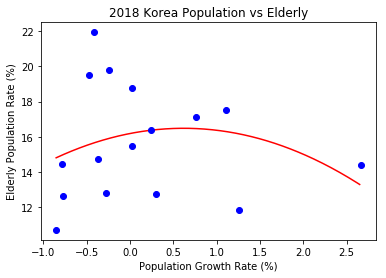

In [5]:
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, 0.76, 2.66]
Y = [12.77, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

print("a : ", a.numpy(), ", b :", b.numpy(), ", c :", c.numpy())

# 잔차의 제곱의 평균을 구하는 과정
def compute_loss():
    y_p = a * X * X + b * X + c
    loss = tf.reduce_mean((Y - y_p) ** 2)
    return loss

# optimizer 설정, Adam을 활용, 학습률 0.07 설정
optimizer = tf.keras.optimizers.Adam(lr = 0.07)

# 학습 단계
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화 시켜주기 위한 과정
    optimizer.minimize(compute_loss, var_list = [a, b, c])

    # record 설정
    if i % 100 == 0:
        print(i, "번째 a : ", a.numpy(), ", b :", b.numpy(), ", c :", c.numpy(), ", loss", compute_loss().numpy())

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구한다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b * line_x + c

# 시각화
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.title('2018 Korea Population vs Elderly')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

### c. 3차 함수 회귀

a :  0.44606817 , b : 0.023296176 , c : 0.006328669 , d : 0.3181334
0 번째 a :  0.51606816 , b : 0.09329616 , c : 0.07632839 , d : 0.3881334 , loss 229.34807
100 번째 a :  -1.247086 , b : 5.376331 , c : -2.0231638 , d : 6.4909034 , loss 67.917366
200 번째 a :  -2.2386832 , b : 6.7559443 , c : -0.52459097 , d : 10.239773 , loss 30.225391
300 번째 a :  -1.8539956 , b : 5.202921 , c : -0.018922765 , d : 12.369803 , loss 19.872667
400 번째 a :  -1.062605 , b : 2.8438208 , c : 0.13363302 , d : 13.788906 , loss 14.125193
500 번째 a :  -0.31956723 , b : 0.6978936 , c : 0.2042153 , d : 14.873929 , loss 10.704309
600 번째 a :  0.27006167 , b : -0.99709135 , c : 0.25209653 , d : 15.705906 , loss 8.870316
700 번째 a :  0.70347154 , b : -2.242079 , c : 0.28639254 , d : 16.31385 , loss 7.9877334
800 번째 a :  1.0034077 , b : -3.1034927 , c : 0.30997533 , d : 16.73388 , loss 7.6056075
900 번째 a :  1.1994355 , b : -3.6664429 , c : 0.32535276 , d : 17.00823 , loss 7.4566817


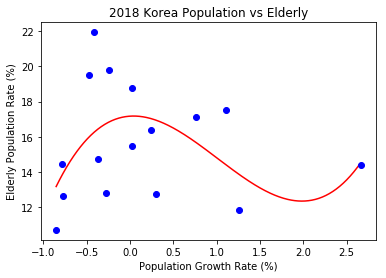

In [6]:
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, 0.76, 2.66]
Y = [12.77, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

print("a : ", a.numpy(), ", b :", b.numpy(), ", c :", c.numpy(), ", d :", d.numpy())

# 잔차의 제곱의 평균을 구하는 과정
def compute_loss():
    y_p = a * X * X * X + b * X * X + c * X + d
    loss = tf.reduce_mean((Y - y_p) ** 2)
    return loss

# optimizer 설정, Adam을 활용, 학습률 0.07 설정
optimizer = tf.keras.optimizers.Adam(lr = 0.07)

# 학습 단계
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화 시켜주기 위한 과정
    optimizer.minimize(compute_loss, var_list = [a, b, c, d])

    # record 설정
    if i % 100 == 0:
        print(i, "번째 a : ", a.numpy(), ", b :", b.numpy(), ", c :", c.numpy(), ", d :", d.numpy(), ", loss", compute_loss().numpy())

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구한다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c * line_x + d

# 시각화
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.title('2018 Korea Population vs Elderly')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

## 3. keras의 딥러닝 네트워크를 활용한 회귀(Regression)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1/1 [==============================] - 0s 286ms/step - loss: 256.2976
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 105.9199
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 9.6435
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 9.3948
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 9.3638
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 9.3363
Epoch 7/10
1/1 [==============================] - 0s 5

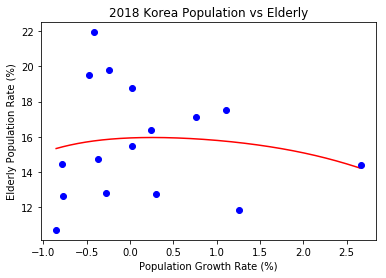

In [7]:
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, 0.76, 2.66]
Y = [12.77, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 6, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units = 1)]
)

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss = 'mse')
model.summary()

model.fit(X, Y, epochs=10) # 10회 학습시킨다.
model.predict(X)

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구한다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

# 시각화
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.title('2018 Korea Population vs Elderly')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()